<img src='11.jpg'>

In [8]:
#pip install pycaret

In [2]:
import pandas as pd

In [3]:
#Regression AutoMl

In [4]:
from pycaret.regression import*

In [7]:
df=pd.read_csv('retail_price.csv')

In [9]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [11]:
setup(data=df,target='total_price')

,Description,Value
0,Session id,813
1,Target,total_price
2,Target type,Regression
3,Original data shape,"(676, 30)"
4,Transformed data shape,"(676, 57)"
5,Transformed train set shape,"(473, 57)"
6,Transformed test set shape,"(203, 57)"
7,Numeric features,26
8,Categorical features,3
9,Preprocess,True


In [12]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,153.6438,113647.4503,307.2902,0.9649,0.2570,0.1843,0.2850
xgboost,Extreme Gradient Boosting,163.4086,154400.9715,368.4110,0.9483,0.1615,0.1162,0.4030
et,Extra Trees Regressor,164.2298,176019.2927,390.7804,0.9428,0.1631,0.1202,0.6680
rf,Random Forest Regressor,184.7683,205057.1067,417.3312,0.9371,0.1687,0.1297,0.7960
lightgbm,Light Gradient Boosting Machine,217.3202,245470.2598,479.2120,0.9178,0.3528,0.2159,0.6610
dt,Decision Tree Regressor,285.8389,537682.4669,668.2487,0.8336,0.2485,0.1827,0.1140
ada,AdaBoost Regressor,577.6481,588565.8081,753.2837,0.7930,0.9229,1.5970,0.2260
ridge,Ridge Regression,503.9967,601610.4423,763.0157,0.7866,0.8310,1.1802,0.1150
llar,Lasso Least Angle Regression,503.6515,602321.9362,763.3608,0.7866,0.8420,1.1789,0.1880
lasso,Lasso Regression,503.6538,602325.5304,763.3642,0.7866,0.8421,1.1789,0.1210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
#Yukarıda AutoML ile tahmin yaptık
#Aşağıda fiyatar arasında grafikler çizip bir Gradient Boosting Regressor modeli ile tahmin yapacağız

In [18]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [19]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [20]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [21]:
df.corr()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
qty,1.000000,0.749605,-0.135521,-0.103432,0.079973,-0.022749,0.128515,-0.034301,-0.004028,0.441547,...,-0.033570,-0.047883,-0.053477,-0.027044,0.036633,-0.069855,-0.068522,-0.074466,-0.086439,-0.085885
total_price,0.749605,1.000000,0.025848,0.409001,-0.002594,0.175376,0.157945,0.060092,0.036119,0.386389,...,0.144426,0.058941,-0.006729,0.203050,0.113178,-0.001240,0.121114,-0.240526,-0.077442,0.426256
freight_price,-0.135521,0.025848,1.000000,0.203659,0.013398,0.423219,-0.200990,0.670689,0.199468,0.088261,...,-0.013969,-0.053927,0.306479,-0.084208,0.168881,0.484647,-0.089285,0.054627,0.412115,0.201143
unit_price,-0.103432,0.409001,0.203659,1.000000,-0.170613,0.280176,0.076990,0.112958,0.042162,0.043391,...,0.317113,0.197425,-0.004518,0.466459,0.085436,0.026601,0.383780,-0.242111,0.019461,0.994453
product_name_lenght,0.079973,-0.002594,0.013398,-0.170613,1.000000,0.124510,0.131951,-0.044050,0.163520,0.082239,...,-0.344125,0.019053,-0.079388,-0.240613,-0.055069,0.016903,-0.382787,0.117217,-0.001470,-0.174862
product_description_lenght,-0.022749,0.175376,0.423219,0.280176,0.124510,1.000000,0.060124,0.386973,0.187544,0.067497,...,-0.004371,0.188601,0.031771,0.015030,0.162777,0.155763,0.043880,0.048146,0.186760,0.273883
product_photos_qty,0.128515,0.157945,-0.200990,0.076990,0.131951,0.060124,1.000000,-0.129291,0.048286,-0.022536,...,-0.045398,-0.005677,-0.194512,-0.133835,-0.042817,-0.158749,-0.000661,0.061731,-0.044935,0.075246
product_weight_g,-0.034301,0.060092,0.670689,0.112958,-0.044050,0.386973,-0.129291,1.000000,0.178678,0.053523,...,0.064330,-0.241861,0.138384,-0.017125,0.144289,0.320658,-0.035559,0.208836,0.351268,0.112790
product_score,-0.004028,0.036119,0.199468,0.042162,0.163520,0.187544,0.048286,0.178678,1.000000,0.020185,...,-0.215284,0.297746,-0.117613,-0.064352,0.506967,0.050800,-0.124399,0.353623,0.049791,0.035109
customers,0.441547,0.386389,0.088261,0.043391,0.082239,0.067497,-0.022536,0.053523,0.020185,1.000000,...,-0.177735,0.077314,-0.204012,-0.142704,0.148290,-0.156454,-0.115673,-0.220235,-0.172532,0.056988


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


<Axes: >

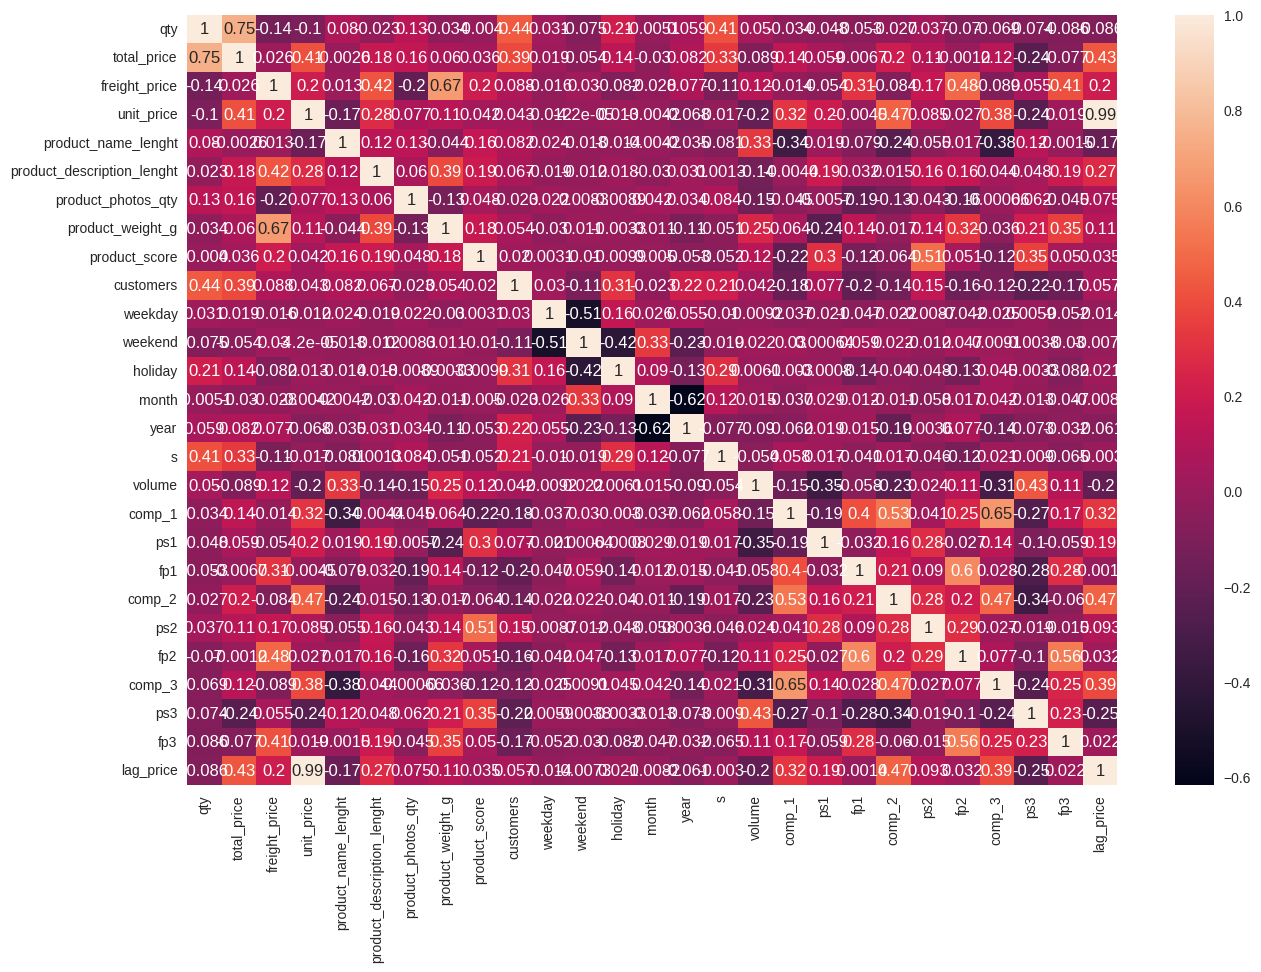

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [27]:
#ürünlerin fiyat dağılımları

In [25]:
fig = px.histogram(df,
                   x='total_price',
                   nbins=20,
                   title='Distribution of Total Price')
fig.show()

In [28]:
#kutu grafiği kullanarak birim fiyatların dağılımı

In [26]:
fig = px.box(df,
             y='unit_price',
             title='Box Plot of Unit Price')
fig.show()

In [29]:
#miktar ile toplam fiyatlar arasındaki ilişki

In [30]:
fig = px.scatter(df,
                 x='qty',
                 y='total_price',
                 title='Quantity vs Total Price', trendline="ols")
fig.show()

In [32]:
 #ürün kategorilerine göre ortalama toplam fiyatlar

In [33]:
fig = px.bar(df, x='product_category_name',
             y='total_price',
             title='Average Total Price by Product Category')
fig.show()

In [34]:
df['comp_price_diff'] = df['unit_price'] - df['comp_1']

avg_price_diff_by_category = df.groupby('product_category_name')['comp_price_diff'].mean().reset_index()

fig = px.bar(avg_price_diff_by_category,
             x='product_category_name',
             y='comp_price_diff',
             title='Average Competitor Price Difference by Product Category')
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Average Competitor Price Difference'
)
fig.show()

In [39]:
X = df[['qty', 'unit_price', 'comp_1',
          'product_score', 'comp_price_diff']]
y = df['total_price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [42]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
tahmin=model.predict(X_test)

In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers',
                         marker=dict(color='blue'),
                         name='Predicted vs. Actual Retail Price'))
fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)],
                         mode='lines',
                         marker=dict(color='red'),
                         name='Ideal Prediction'))
fig.update_layout(
    title='Predicted vs. Actual Retail Price',
    xaxis_title='Actual Retail Price',
    yaxis_title='Predicted Retail Price'
)
fig.show()

In [47]:
r2_score(tahmin,y_test)

0.9645489545923309

In [48]:
(mean_squared_error(tahmin,y_test))**0.5

308.2844367378474